![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#**Máster en Inteligencia Artificial Avanzada y Aplicada:  IA^3**
---

# Ejercicio de CNN
Para estos ejercicios trabajaremos con el conjunto de datos <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a>, también disponible a través de <a href='https://pytorch.org/docs/stable/torchvision/index.html'>.<tt><strong>torchvision</strong></tt></a>. Al igual que MNIST, este conjunto de datos consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de entre 10 clases *(mantenemos los nombres en inglés)*:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANTE!</strong><br> Asegúrate de no ejecutar las celdas que hay justo encima de la salida de ejemplo que se muestra, ya que de lo contrario, acabarás escribiendo sobre la salida del ejemplo</div>

## Importaciones y carga del dataset Fashion-MNIST
PyTorch pone a disposición el conjunto de datos Fashion-MNIST a través de <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. Como con otros datasets contenidos en la librería, la primera vez que se llame, el conjunto de datos se descargará en su ordenador en la ruta especificada. A partir de ese momento, torchvision buscará siempre una copia local antes de intentar otra descarga.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

100%|██████████| 26421880/26421880 [00:01<00:00, 16430966.42it/s]


Extracting ../Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 312648.87it/s]


Extracting ../Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5528758.15it/s]


Extracting ../Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12164663.09it/s]


Extracting ../Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



## 1. Creamos los data loaders (*cargadores* de datos)
Empleamos DataLoader para crear los subconjuntos <tt>train_loader</tt> y <tt>test_loader</tt>. <br>
El tamaño de lote será 10 para ambos.

In [ ]:
# TU CODIGO AQUÍ




In [ ]:
# NO ESCRIBIR AQUÍ


## 2. Examina un lote de imágenes
Usa DataLoader, <tt>make_grid</tt> y matplotlib to visualizar el primer lote de 10 imágenes.<br>
*OPCIONAL: visualiza también las etiquetas.*

In [ ]:
# TU CODIGO AQUÍ






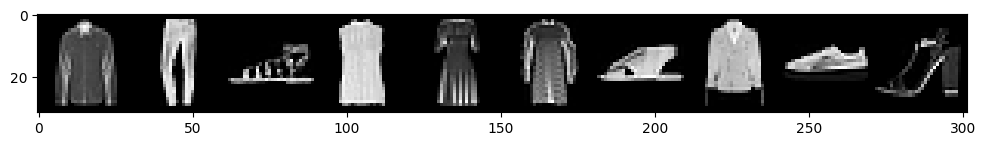

In [ ]:
# NO ESCRIBIR AQUÍ
# SOLO IMÁGENES


Label:  [1 4 4 8 6 0 6 9 2 9]
Class:  Trouser Coat Coat Bag Shirt T-shirt Shirt Boot Sweater Boot


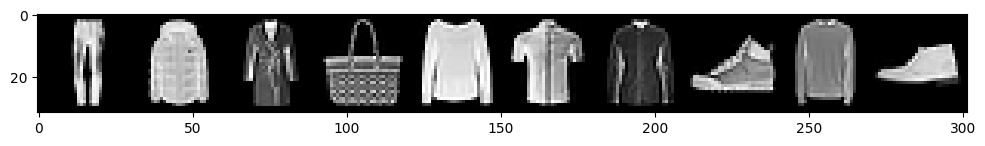

In [ ]:
# NO ESCRIBIR AQUÍ
# IMÁGENES Y ETIQUETAS


## Downsampling
<h3>3. Si se hace pasar una imagen de 28x28 por una capa convolucional utilizando un filtro de 5x5, un tamaño de paso de 1 y sin padding, ¿cuál es el tamaño de matriz resultante?</h3>

*(Pon aquí tu respuesta)*

In [ ]:
# Ejecuta el siguiente código para comprobar tu respuesta:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

### 4. Si la muestra de la pregunta 3 se pasa por una capa MaxPooling de 2x2, ¿cuál es el tamaño de matriz resultante?

*(Pon aquí tu respuesta)*

In [ ]:
# Ejecuta el siguiente código para comprobar tu respuesta:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

## Definicion de la red CNN
### 5. Definir una red neuronal convolucional
Define un modelo CNN que pueda entrenarse con el conjunto de datos Fashion-MNIST. El modelo debe contener:
+ dos capas convolucionales,
+ dos capas de agrupación (max_pooling)
+ y dos capas totalmente conectadas (FC).

Puedes utilizar cualquier número de neuronas por capa siempre que el modelo tome una imagen de 28x28 y devuelva una salida de 10. Se han rellenado partes de la definición por comodidad.

In [ ]:
# TU CODIGO AQUÍ
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      # Aquí las capas...
      #



    def forward(self, X):
      # Aquí las operaciones en orden...
      #


      return # aquí lo que retornas

torch.manual_seed(101)
model = ConvolutionalNetwork()

## Parámetros

### 6. ¿Cuál es el número total de parámetros entrenables (pesos y biases) en el modelo anterior?
Las respuestas variarán en función de la definición del modelo. Para la red definida:

<div style='border:1px black solid; padding:5px'>
$\quad\begin{split}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times100)+100+(100\times10)+10 &=\\
54+6+864+16+40000+100+1000+10 &= 42,050\end{split}$<br>
</div>

In [ ]:
# Ejecuta el siguiente código para comprobar tu respuesta:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

### 7. Definimos función de pérdida & optimizador
Define una función de pérdida llamandola "criterion" y un optimizador llamándolo "optimizer".<br>
Puedes utilizar las funciones que quieras, aunque nosotros utilizamos Cross Entropy Loss y Adam (con learning rate de 0.001) respectivamente.

In [ ]:
# TU CODIGO AQUÍ



In [ ]:
# NO ESCRIBIR AQUÍ

### 8. Entrena el modelo
No te preocupes por el seguimiento de los valores de pérdida, la visualización de los resultados o la validación del conjunto de pruebas. Simplemente entrena el modelo durante 5 épocas. Evaluaremos el modelo entrenado en el siguiente paso.<br>
OPCIONAL: imprime algo tras cada época para ver que se está realizando el entrenamiento y hay un progreso.

In [ ]:
# TU CODIGO AQUÍ



In [ ]:
# NO ESCRIBIR AQUÍ


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evalua el modelo
Activa el modo <tt>model.eval()</tt> y determina el porcentaje acertado correctamente del total de las 10.000 imágenes de test.

In [ ]:
# TU CODIGO AQUÍ



In [ ]:
# NO ESCRIBIR AQUÍ


Test accuracy: 8733/10000 =  87.330%


## Buen trabajo!
Puedes probar diferentes combinaciones para intentar mejorar el resultado. ¿Que elementos y parámetros puedes ajustar?<br>
Este dataset es "manejable", aprovechalo y prueba configuraciones.

## Fin del notebook

###Referencias y modelos empleados para el Notebook:

*   Documentación de [Pytorch](https://pytorch.org/docs/stable/index.html)
*   [PyTorch Tutorial for Deep Learning Researchers](https://github.com/yunjey/pytorch-tutorial) by Yunjey Choi
*   [FastAI](https://www.fast.ai/) development notebooks by Jeremy Howard.
*   Documentación y cursos en [Pierian Data](https://www.pieriandata.com/)
* Matriz de confusión: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>scikit-learn's confusion_matrix</a>
+ Gráficos: <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps</a>, and <a href='https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html'>matplotlib colormaps</a>.